In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam

# input file path
workdir = "E://Ronny_TF//200914_reupload//Dataset//Scenario2_EDC-11K"

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())




[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7662927951791493259
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8267812044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1918882657439902522
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [5]:
# input and index file
dataset = np.load(workdir + "//200914_EDC11K.npz")
ss0 = np.load(workdir + '//200914_EDC11K_r0_9_1.npz')

In [6]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [7]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [8]:
# checking the size of dataset
x.shape

(11360, 21313)

In [9]:
# checking the size of training set
training_image_array.shape

(10224, 21313)

In [10]:
# hyperparameters of this model
num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100



In [11]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array




In [12]:
# data shaping for ResNet model
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
#input_shape = (img_rows, img_cols, 1)

In [14]:
# data shape
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10224, 21313, 1) (10224,) (1136, 21313, 1) (1136,)


In [15]:
# defining of data type
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 21313, 1)
10224 train samples
1136 test samples


In [17]:
# model architecture
with K.tf.device('/GPU:0'):
    inputs = Input(shape=(train_X.shape[1],1),name='inputs')

    x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
    x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
#     y = x
    x = Activation('tanh')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)
    
    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

#     x = AveragePooling1D(pool_size=8)(x)
    x = Flatten()(x)
    x = Dense(units=2048, name='dense1'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout1') (x)
    x = Activation('relu')(x)

#    x = Reshape((300,1))(x)

#    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
#    x = MaxPooling1D(pool_size=2)(x)
#    x = BatchNormalization()(x)

    x = Dense(units=1024, name='dense5'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout5') (x)
    x = Activation('relu')(x)

    x = Dense(units=512, name='dense6'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout6') (x)
    x = Activation('relu')(x)

    x = Dense(units=1024, name='dense7'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout7') (x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Dense(units=512, name='dense8'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout8') (x)
    x = Activation('relu')(x)
    
    x = Dense(units=256, name='dense9'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout9') (x)
    x = Activation('relu')(x)

    x = Dense(units=128, name='dense10'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout10') (x)
    x = Activation('relu')(x)


    predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)
#     predictions = Dense(1, activation='linear', name='predictions')(x)

    

    model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
    model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=keras.optimizers.Adam(learning_rate),
                  metrics=['mse','mae'])


In [18]:
# model architecture
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 21313, 1)     0                                            
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 10657, 16)    64          inputs[0][0]                     
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 2131, 16)     0           conv1d_23[0][0]                  
__________________________________________________________________________________________________
batch_normalization_28 (BatchNo (None, 2131, 16)     64          max_pooling1d_2[0][0]            
__________________________________________________________________________________________________
activation

In [19]:
# model fitting
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit(train_X, training_label_array, batch_size=batch_size,epochs=training_epochs,verbose=1,
                        validation_data=(test_X, test_label_array))

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-09-15 10:36:54.729017
Train on 10224 samples, validate on 1136 samples
Epoch 1/150
10224/10224 [==============================] - 32s 3ms/step - loss: 4.7079 - mean_squared_error: 4.7079 - mean_absolute_error: 1.9692 - val_loss: 4.7578 - val_mean_squared_error: 4.7578 - val_mean_absolute_error: 1.9813
Epoch 2/150
10224/10224 [==============================] - 15s 1ms/step - loss: 4.6746 - mean_squared_error: 4.6746 - mean_absolute_error: 1.9586 - val_loss: 4.7245 - val_mean_squared_error: 4.7245 - val_mean_absolute_error: 1.9706
Epoch 3/150
10224/10224 [==============================] - 15s 1ms/step - loss: 4.6426 - mean_squared_error: 4.6426 - mean_absolute_error: 1.9482 - val_loss: 4.6922 - val_mean_squared_error: 4.6922 - val_mean_absolute_error: 1.9600
Epoch 4/150
10224/10224 [==============================] - 15s 1ms/step - loss: 4.6118 - mean_squared_error: 4.6118 - mean_absolute_error: 1.9381 - val_loss: 4.6611 - val_mean_squared_error: 4.6611 - val_mean_absolut

Epoch 36/150
10224/10224 [==============================] - 15s 1ms/step - loss: 4.0702 - mean_squared_error: 4.0702 - mean_absolute_error: 1.6859 - val_loss: 4.1078 - val_mean_squared_error: 4.1078 - val_mean_absolute_error: 1.6918
Epoch 37/150
10224/10224 [==============================] - 15s 1ms/step - loss: 4.0636 - mean_squared_error: 4.0636 - mean_absolute_error: 1.6803 - val_loss: 4.1008 - val_mean_squared_error: 4.1008 - val_mean_absolute_error: 1.6860
Epoch 38/150
10224/10224 [==============================] - 15s 1ms/step - loss: 4.0573 - mean_squared_error: 4.0573 - mean_absolute_error: 1.6748 - val_loss: 4.0941 - val_mean_squared_error: 4.0941 - val_mean_absolute_error: 1.6802
Epoch 39/150
10224/10224 [==============================] - 15s 1ms/step - loss: 4.0514 - mean_squared_error: 4.0514 - mean_absolute_error: 1.6692 - val_loss: 4.0879 - val_mean_squared_error: 4.0879 - val_mean_absolute_error: 1.6747
Epoch 40/150
10224/10224 [==============================] - 15s 1ms/

10224/10224 [==============================] - 15s 1ms/step - loss: 3.9925 - mean_squared_error: 3.9925 - mean_absolute_error: 1.5632 - val_loss: 4.0206 - val_mean_squared_error: 4.0206 - val_mean_absolute_error: 1.5646
Epoch 107/150
10224/10224 [==============================] - 15s 1ms/step - loss: 3.9925 - mean_squared_error: 3.9925 - mean_absolute_error: 1.5632 - val_loss: 4.0207 - val_mean_squared_error: 4.0207 - val_mean_absolute_error: 1.5647
Epoch 108/150
10224/10224 [==============================] - 15s 1ms/step - loss: 3.9925 - mean_squared_error: 3.9925 - mean_absolute_error: 1.5633 - val_loss: 4.0207 - val_mean_squared_error: 4.0207 - val_mean_absolute_error: 1.5649
Epoch 109/150
10224/10224 [==============================] - 15s 1ms/step - loss: 3.9925 - mean_squared_error: 3.9925 - mean_absolute_error: 1.5634 - val_loss: 4.0207 - val_mean_squared_error: 4.0207 - val_mean_absolute_error: 1.5647
Epoch 110/150
10224/10224 [==============================] - 15s 1ms/step - lo

In [20]:
# model save
import json
from keras.models import model_from_json, load_model
workdir = "E://Ronny_TF//200914_reupload//Result//EDC-11K"
# Option 1: Save Weights + Architecture
model.save_weights(workdir + '//EDC11K_ResNet_model_weight_v3.h5')
with open(workdir + '//EDC11K_ResNet_model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())

In [21]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//EDC11K_ResNet_model_entire_model.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [22]:
# model evaluation
test_eval = model.evaluate(test_X, test_label_array, verbose=1)

1136/1136 [==============================] - 1s 553us/step


In [23]:
test_eval

[4.020624343778046, 4.020624343778046, 1.5644070699181356]

In [24]:
# loss record
accuracy = model_train.history['mean_squared_error']
val_accuracy = model_train.history['val_mean_squared_error']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [25]:
# loss record
np.savetxt("EDC11K_ResNet_acc_cls3_fix_2080ti_v3.csv", np_acc, delimiter=",")
np.savetxt("EDC11K_ResNet_val_acc_cls3_fix_2080ti_v3.csv", np_val_acc, delimiter=",")
np.savetxt("EDC11K_ResNet_loss_cls3_fix_2080ti_v3.csv", np_loss, delimiter=",")
np.savetxt("EDC11K_ResNet_val_loss_cls3_fix_2080ti_v3.csv", np_val_loss, delimiter=",")

In [26]:
import matplotlib
from matplotlib import pyplot as plt

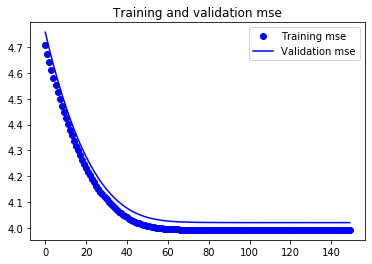

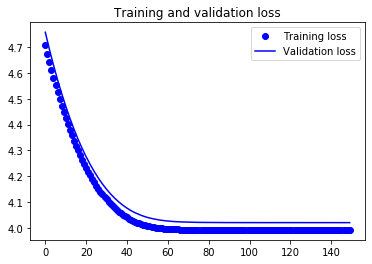

In [27]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(workdir + '//EDC11K_ResNet_mse_loss_plot.png')
plt.show()

In [28]:
predicted_classes = model.predict(test_X)

In [29]:
predicted_value = predicted_classes

In [30]:
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
c.to_csv(workdir + '//200915_EDC11K_ResNet_pred_and_val_result.csv', index=False)


In [31]:
# result table
c.head()

,Predicted,Test
0,0.856339,2.079442
1,0.856339,-3.022156
2,0.856339,2.079442
3,0.856339,2.079442
4,0.856339,2.079442


In [32]:
predicted_value.shape

(1136, 1)

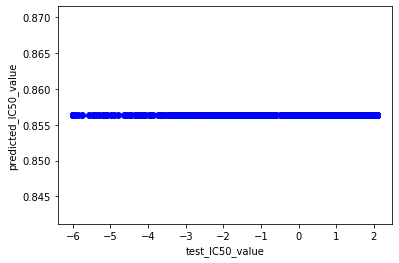

In [33]:
# scatter plot
plt.scatter(test_label_array,predicted_value,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//EDC11K_ResNet_test_scatterplot.png')

In [34]:
# R-squared value
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

-0.00012929050629439942


In [35]:
# Linear regression value (slope)
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.0, intercept=0.8563390374183655, rvalue=0.0, pvalue=1.0, stderr=0.0)

In [36]:
# RMSE
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.0051494445768694
